In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import glob
import os

#import statannotations
from statannot import add_stat_annotation

In [2]:
# Open img-scout dfs

data_dir = '/Users/kathleenkanaley/Desktop/grapes_from_space/data/'
data_20 = pd.read_csv(data_dir +'img_scout_dfs/2020/smr_vis_skysat_scout_2020.csv').dropna()
data_21 = pd.read_csv(data_dir +'img_scout_dfs/2021/smr_vis_skysat_scout_2021.csv').dropna()
data_22 = pd.read_csv(data_dir +'img_scout_dfs/2022/smr_vis_skysat_scout_2022.csv').dropna()

data_21 = data_21[data_21['Date']!='2021-08-03']
data_20 = data_20[data_20['Date']!='2020-09-09']

img_dfs = [data_20, data_21, data_22]

In [3]:
# Open scout-only data
data_dir = '/Users/kathleenkanaley/Desktop/grapes_from_space/data/'
scout_20 = pd.read_csv(data_dir +'scout/scout_incidence/scout_inc_2020.csv')
scout_21 = pd.read_csv(data_dir +'scout/scout_incidence/scout_inc_2021.csv')
scout_22 = pd.read_csv(data_dir +'scout/scout_incidence/scout_inc_2022.csv')

scout_20_nosept = scout_20[scout_20['Date']!='2020-09-09']
scout_21_noaug3 = scout_21[scout_21['Date']!='2021-08-03']

scout_dfs = [scout_20_nosept, scout_21_noaug3, scout_22]

In [4]:
# Add disease class column
for df in scout_dfs:
    df['sev_class'] = 'low'
    df.loc[df['DM_severity'] > 10, 'sev_class'] = 'high'
    
    df['inc_class'] = 'low'
    df.loc[df['DM_inc'] > 25, 'inc_class'] = 'high'


/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_5542/1634892817.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sev_class'] = 'low'
/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_5542/1634892817.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inc_class'] = 'low'
/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_5542/1634892817.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [6]:
for df in img_dfs:
    df['sev_class'] = 'low'
    df.loc[df['DM_severity'] > 10, 'sev_class'] = 'high'
    
    df['inc_class'] = 'low'
    df.loc[df['DM_inc'] > 25, 'inc_class'] = 'high'

Text(0.5, 1.0, 'GDM Severity Class by Date, 2020')

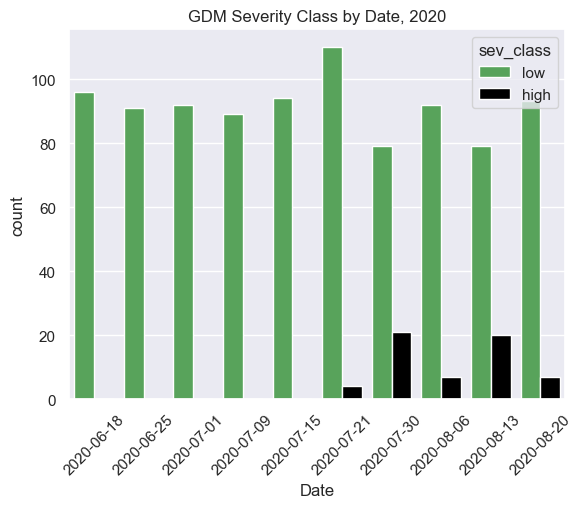

In [7]:
sns.set_theme(style="darkgrid")
colors = ["#4CAF50", "#000000"]
sns.set_palette(sns.color_palette(colors))

sns.countplot(data=scout_20_nosept, x="Date", hue="sev_class")
plt.xticks(rotation=45)
plt.title('GDM Severity Class by Date, 2020')

# #plt.savefig('..figs/sevbydate_dmtrial.png')

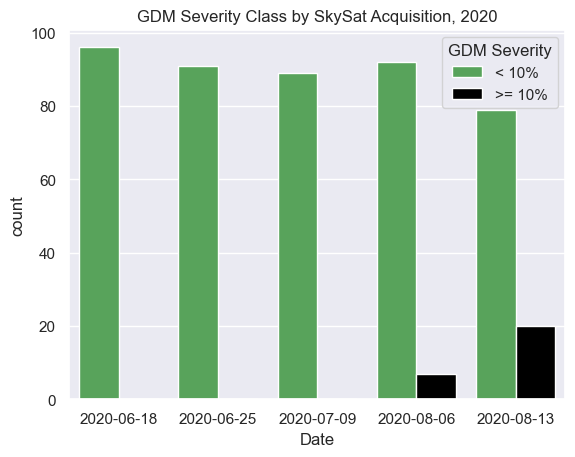

In [8]:
# sns.set_theme(style="darkgrid")
# colors = ["#4CAF50", "#000000"]
# sns.set_palette(sns.color_palette(colors))

sns.countplot(data=data_20, x="Date", hue="sev_class")
#plt.xticks(rotation=45)
plt.title('GDM Severity Class by SkySat Acquisition, 2020')
plt.legend(title='GDM Severity', loc='upper right', labels=['< 10%', '>= 10%'])

# #plt.savefig('..figs/sevbydate_dmtrial.png')

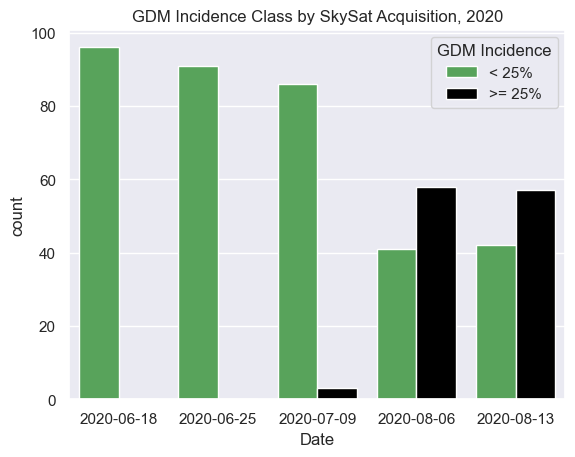

In [9]:
# sns.set_theme(style="darkgrid")
# colors = ["#4CAF50", "#000000"]
# sns.set_palette(sns.color_palette(colors))

sns.countplot(data=data_20, x="Date", hue="inc_class")
#plt.xticks(rotation=45)
plt.title('GDM Incidence Class by SkySat Acquisition, 2020')
plt.legend(title='GDM Incidence', loc='upper right', labels=['< 25%', '>= 25%'])

# #plt.savefig('..figs/sevbydate_dmtrial.png')

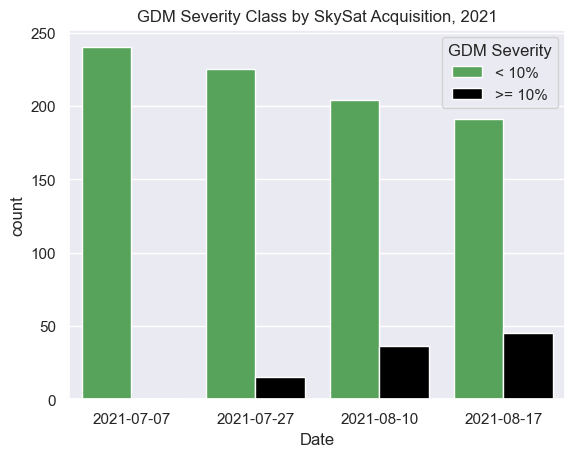

In [10]:
# sns.set_theme(style="darkgrid")
# colors = ["#4CAF50", "#000000"]
# sns.set_palette(sns.color_palette(colors))

sns.countplot(data=data_21, x="Date", hue="sev_class")
#plt.xticks(rotation=45)
plt.title('GDM Severity Class by SkySat Acquisition, 2021')
plt.legend(title='GDM Severity', loc='upper right', labels=['< 10%', '>= 10%'])

# #plt.savefig('..figs/sevbydate_dmtrial.png')

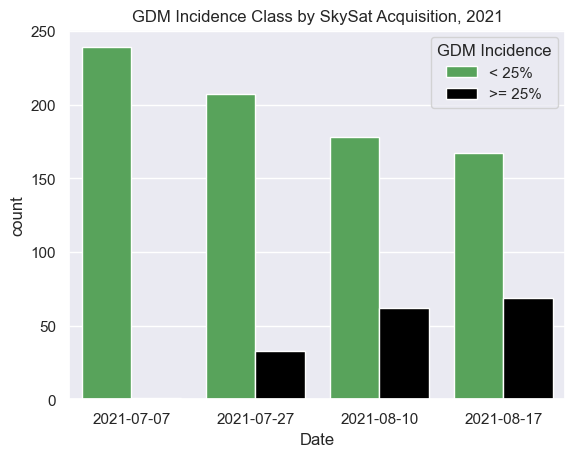

In [11]:
# sns.set_theme(style="darkgrid")
# colors = ["#4CAF50", "#000000"]
# sns.set_palette(sns.color_palette(colors))

sns.countplot(data=data_21, x="Date", hue="inc_class")
#plt.xticks(rotation=45)
plt.title('GDM Incidence Class by SkySat Acquisition, 2021')
plt.legend(title='GDM Incidence', loc='upper right', labels=['< 25%', '>= 25%'])
# #plt.savefig('..figs/sevbydate_dmtrial.png')

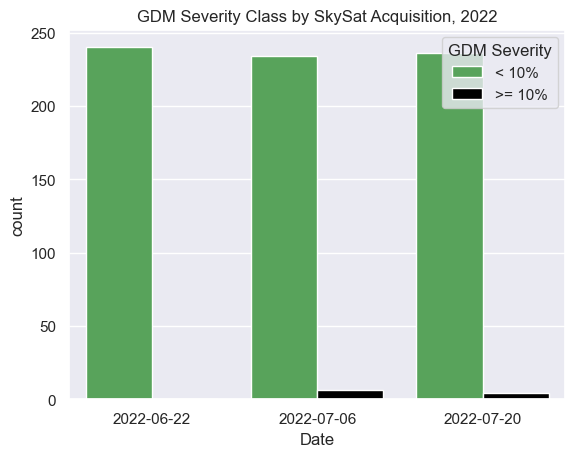

In [12]:
# sns.set_theme(style="darkgrid")
# colors = ["#4CAF50", "#000000"]
# sns.set_palette(sns.color_palette(colors))

sns.countplot(data=data_22, x="Date", hue="sev_class")
#plt.xticks(rotation=45)
plt.title('GDM Severity Class by SkySat Acquisition, 2022')
plt.legend(title='GDM Severity', loc='upper right', labels=['< 10%', '>= 10%'])

# #plt.savefig('..figs/sevbydate_dmtrial.png')

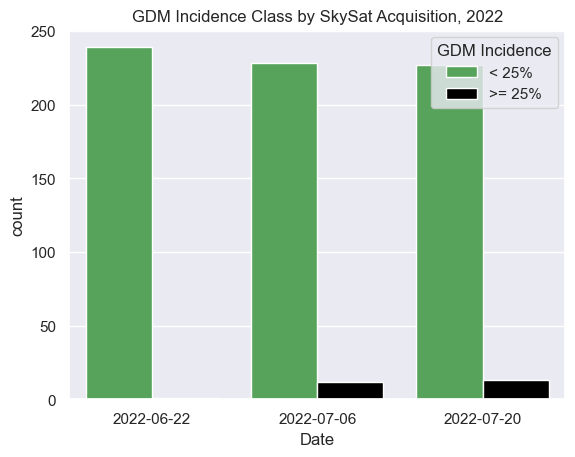

In [13]:
# sns.set_theme(style="darkgrid")
# colors = ["#4CAF50", "#000000"]
# sns.set_palette(sns.color_palette(colors))

sns.countplot(data=data_22, x="Date", hue="inc_class")
#plt.xticks(rotation=45)
plt.title('GDM Incidence Class by SkySat Acquisition, 2022')
plt.legend(title='GDM Incidence', loc='upper right', labels=['< 25%', '>= 25%'])

# #plt.savefig('..figs/sevbydate_dmtrial.png')

In [14]:
# # Visualize data imbalance in all years

# sevcount_20 = data_20.sev_class.value_counts()
# sevcount_20.plot(kind='bar', title='GDM Severity 2020', color=['green', 'black']);
# plt.xlabel('Severity')
# plt.ylabel('Count')
# plt.xticks(ticks = [0,1],labels=['<10%','>=10%'], rotation=0)

([<matplotlib.axis.XTick at 0x1634cc220>,
 [Text(0, 0, '<25%'), Text(1, 0, '>=25%')])

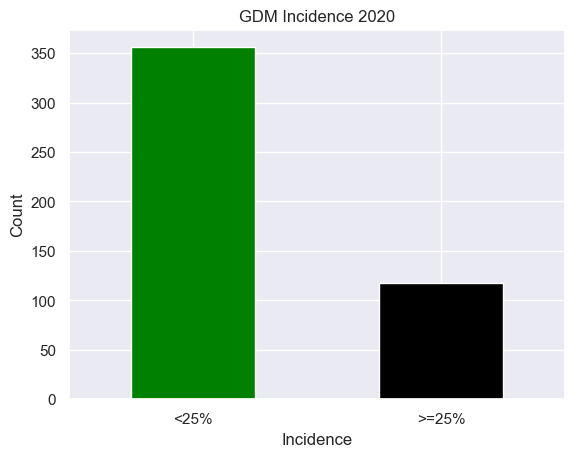

In [14]:
# inccount_20 = data_20.inc_class.value_counts()
# inccount_20.plot(kind='bar', title='GDM Incidence 2020', color=['green', 'black']);
# plt.xlabel('Incidence')
# plt.ylabel('Count')
# plt.xticks(ticks = [0,1],labels=['<25%','>=25%'], rotation=0)

([<matplotlib.axis.XTick at 0x16354c5e0>,
 [Text(0, 0, '<10%'), Text(1, 0, '>=10%')])

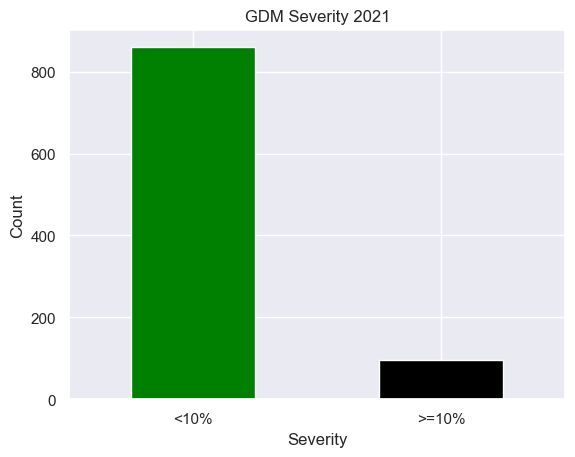

In [15]:
# # Visualize data imbalance in all years

# sevcount_21 = data_21.sev_class.value_counts()
# sevcount_21.plot(kind='bar', title='GDM Severity 2021', color=['green', 'black']);
# plt.xlabel('Severity')
# plt.ylabel('Count')
# plt.xticks(ticks = [0,1],labels=['<10%','>=10%'], rotation=0)

([<matplotlib.axis.XTick at 0x1635c1330>,
 [Text(0, 0, '<25%'), Text(1, 0, '>=25%')])

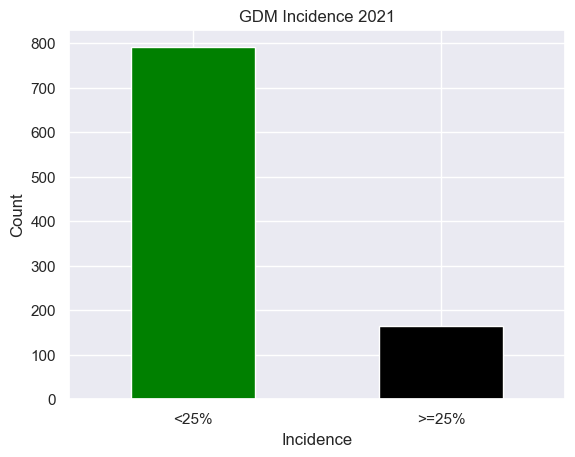

In [16]:
# inccount_21 = data_21.inc_class.value_counts()
# inccount_21.plot(kind='bar', title='GDM Incidence 2021', color=['green', 'black']);
# plt.xlabel('Incidence')
# plt.ylabel('Count')
# plt.xticks(ticks = [0,1],labels=['<25%','>=25%'], rotation=0)

([<matplotlib.axis.XTick at 0x163640610>,
 [Text(0, 0, '<10%'), Text(1, 0, '>=10%')])

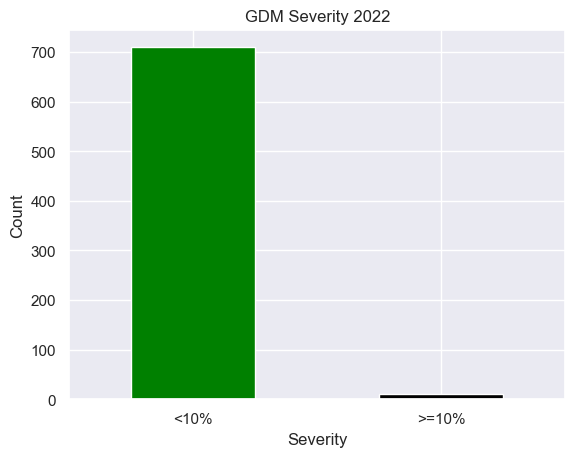

In [17]:
# # Visualize data imbalance in all years

# sevcount_22 = data_22.sev_class.value_counts()
# sevcount_22.plot(kind='bar', title='GDM Severity 2022', color=['green', 'black']);
# plt.xlabel('Severity')
# plt.ylabel('Count')
# plt.xticks(ticks = [0,1],labels=['<10%','>=10%'], rotation=0)

([<matplotlib.axis.XTick at 0x1636bf4f0>,
 [Text(0, 0, '<25%'), Text(1, 0, '>=25%')])

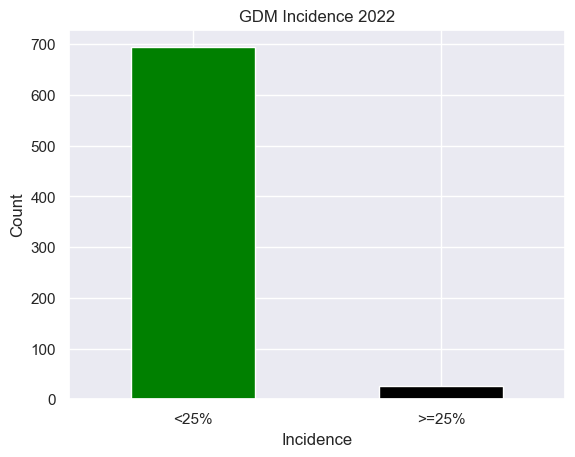

In [18]:
# inccount_22 = data_22.inc_class.value_counts()
# inccount_22.plot(kind='bar', title='GDM Incidence 2022', color=['green', 'black']);
# plt.xlabel('Incidence')
# plt.ylabel('Count')
# plt.xticks(ticks = [0,1],labels=['<25%','>=25%'], rotation=0)

In [ ]:
# Now, reproduce same plots for PScope dates

In [15]:
# 2020 scout: 2020-06-18, 2020-07-15, 2020-07-30
# 2020 image: 2020-06-16, 2020-07-13, 2020-08-01
pscope_20 = ['2020-06-18', '2020-07-15', '2020-07-30'] 
    
# selecting rows based on condition 
pscope20_df = scout_20_nosept[scout_20_nosept['Date'].isin(pscope_20)] 

pscope20_df.Date.unique()

array(['2020-06-18', '2020-07-15', '2020-07-30'], dtype=object)

In [16]:
data_20.Date.unique()

array(['2020-06-18', '2020-06-25', '2020-07-01', '2020-07-09',
       '2020-07-15', '2020-07-21', '2020-07-30', '2020-08-06',
       '2020-08-13', '2020-08-20', '2020-09-09'], dtype=object)

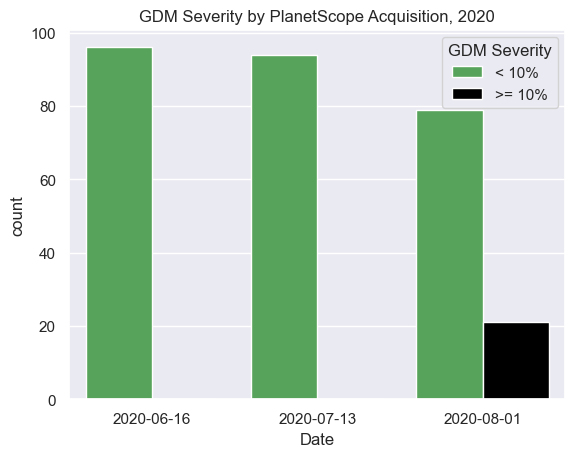

In [18]:
img_dates_20 = ['2020-06-16', '2020-07-13', '2020-08-01']
sns.countplot(data=pscope20_df, x="Date", hue="sev_class")
#plt.xticks(rotation=45)
plt.title('GDM Severity by PlanetScope Acquisition, 2020')
plt.xticks([0,1,2],img_dates_20)
plt.legend(title='GDM Severity', loc='upper right', labels=['< 10%', '>= 10%'])


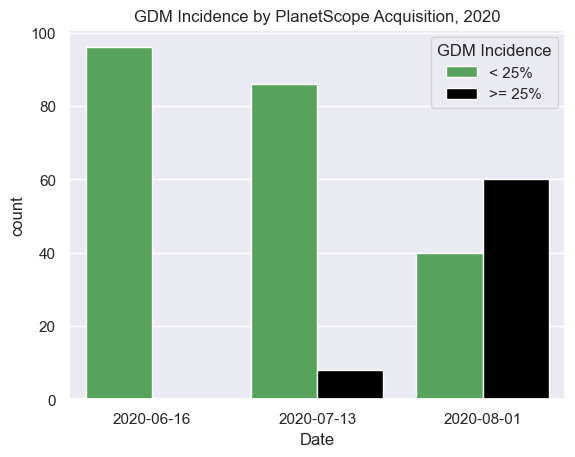

In [19]:
sns.countplot(data=pscope20_df, x="Date", hue="inc_class")
#plt.xticks(rotation=45)
plt.title('GDM Incidence by PlanetScope Acquisition, 2020')
plt.xticks([0,1,2],img_dates_20)
plt.legend(title='GDM Incidence', loc='upper right', labels=['< 25%', '>= 25%'])


In [20]:
# 2021 scout: 2021-07-15, 2021-07-27, 2021-08-10
# 2021 image: 2021-07-15, 2021-07-26, 2021-08-08
pscope_21 = ['2021-07-15', '2021-07-27', '2021-08-10'] 
    
# selecting rows based on condition 
pscope21_df = scout_21_noaug3[scout_21_noaug3['Date'].isin(pscope_21)] 

pscope21_df.Date.unique()

array(['2021-07-15', '2021-07-27', '2021-08-10'], dtype=object)

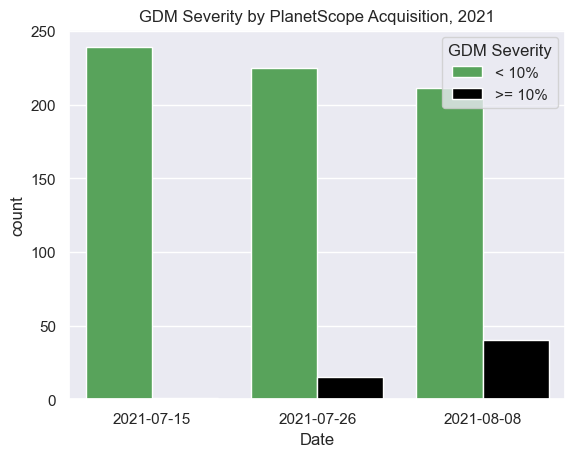

In [21]:
img_dates_21 = ['2021-07-15', '2021-07-26', '2021-08-08']

sns.countplot(data=pscope21_df, x="Date", hue="sev_class")
#plt.xticks(rotation=45)
plt.title('GDM Severity by PlanetScope Acquisition, 2021')
plt.xticks([0,1,2],img_dates_21)
plt.legend(title='GDM Severity', loc='upper right', labels=['< 10%', '>= 10%'])


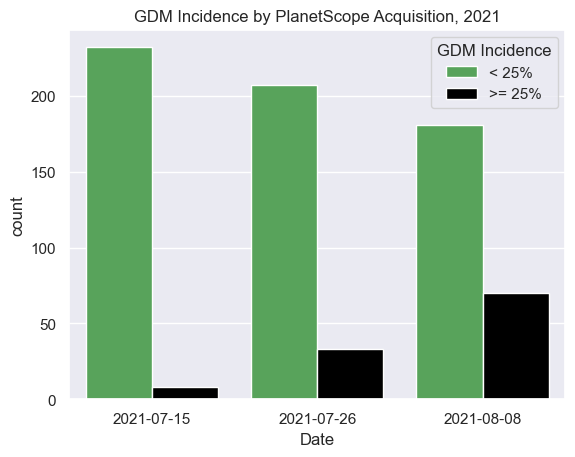

In [22]:
sns.countplot(data=pscope21_df, x="Date", hue="inc_class")
#plt.xticks(rotation=45)
plt.title('GDM Incidence by PlanetScope Acquisition, 2021')
plt.xticks([0,1,2],img_dates_21)
plt.legend(title='GDM Incidence', loc='upper right', labels=['< 25%', '>= 25%'])


In [23]:
# 2022 scout: 2022-06-22, 2022-06-29, 2022-07-06, 2022-07-27, 2022-08-02, 2022-08-29
# 2022 image: 2022-06-24, 2022-06-30, 2022-07-04, 2022-07-26, 2022-08-01
pscope_22 = ['2022-06-22', '2022-06-29', '2022-07-06', '2022-07-27',
             '2022-08-02'] 
    
# selecting rows based on condition 
pscope22_df = scout_22[scout_22['Date'].isin(pscope_22)] 

pscope22_df.Date.unique()

array(['2022-06-22', '2022-06-29', '2022-07-06', '2022-07-27',
       '2022-08-02'], dtype=object)

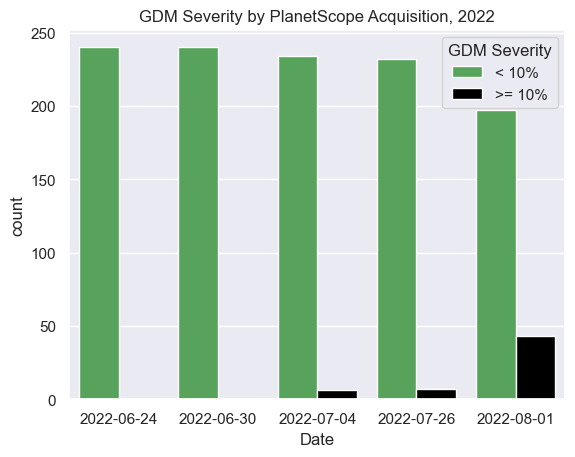

In [25]:
img_dates_22 = ['2022-06-24', '2022-06-30', '2022-07-04', '2022-07-26', '2022-08-01']
sns.countplot(data=pscope22_df, x="Date", hue="sev_class")
#plt.xticks(rotation=30)
plt.title('GDM Severity by PlanetScope Acquisition, 2022')
plt.xticks([0,1,2,3,4],img_dates_22)
plt.legend(title='GDM Severity', loc='upper right', labels=['< 10%', '>= 10%'])


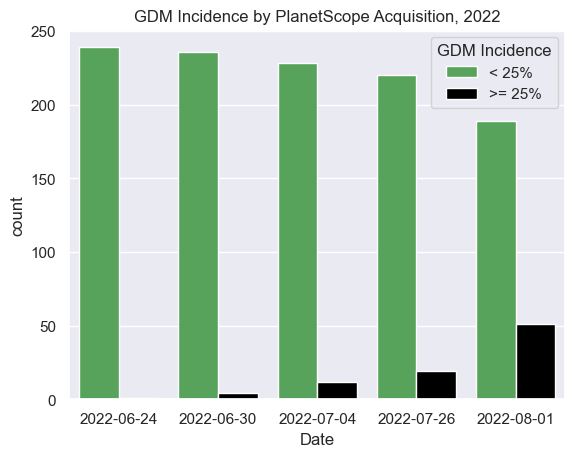

In [26]:
sns.countplot(data=pscope22_df, x="Date", hue="inc_class")
#plt.xticks(rotation=30)
plt.title('GDM Incidence by PlanetScope Acquisition, 2022')
plt.xticks([0,1,2,3,4],img_dates_22)
plt.legend(title='GDM Incidence', loc='upper right', labels=['< 25%', '>= 25%'])


In [7]:
# Find how many high and low sev and incidence panels on 07-26-2021

jul26 = scout_21_noaug3[scout_21_noaug3['Date']=='2021-07-27']

In [14]:
scout_22.Date.unique()

array(['2022-06-22', '2022-06-29', '2022-07-06', '2022-07-14',
       '2022-07-20', '2022-07-27', '2022-08-02', '2022-08-09',
       '2022-08-29'], dtype=object)

In [8]:
jul26

,Date,Row,Panel,Treatment,Block,PM_severity,DM_severity,total_dis,geometry,centroid,PM_inc,DM_inc,sev_class,inc_class
960,2021-07-27,1,1,5.0,DM,0.0,0.000,0.000,POLYGON ((-77.0152645742787 42.878300949250196...,POINT (-77.0153084903025 42.8783140936145),0.0,0.0,low,low
961,2021-07-27,1,2,7.0,DM,0.0,0.000,0.000,POLYGON ((-77.01535545427274 42.87831851925121...,POINT (-77.0153965503027 42.87833067861654),0.0,0.0,low,low
962,2021-07-27,1,3,9.0,DM,0.0,0.000,0.000,POLYGON ((-77.01544069426711 42.87833411925217...,POINT (-77.01548247530272 42.87834674861851),0.0,0.0,low,low
963,2021-07-27,1,4,15.0,DM,0.0,0.000,0.250,POLYGON ((-77.01552730426143 42.87835065925314...,POINT (-77.01557007030289 42.87836309362055),0.0,0.0,low,low
964,2021-07-27,1,5,3.0,DM,0.0,2.850,3.100,POLYGON ((-77.01561588425558 42.87836680925413...,POINT (-77.01565649030296 42.878378758622546),0.0,30.0,low,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2021-07-27,20,7,35.0,PM,0.0,1.075,1.575,POLYGON ((-77.01605814333348 42.87891530908846...,POINT (-77.01609963030329 42.87892805863273),0.0,15.0,low,low
1196,2021-07-27,20,9,27.0,PM,0.0,0.000,0.150,POLYGON ((-77.01588341334502 42.87888258908652...,POINT (-77.0159263203032 42.87889522862877),0.0,0.0,low,low
1197,2021-07-27,20,11,11.0,PM,0.0,0.150,1.150,POLYGON ((-77.01571565335605 42.87885039908464...,POINT (-77.01575419030297 42.87886252362478),0.0,5.0,low,low
1198,2021-07-27,20,13,3.0,PM,0.0,0.200,1.600,POLYGON ((-77.01554440336733 42.87881855908271...,POINT (-77.01558717530287 42.87883104862095),0.0,0.0,low,low


In [12]:
sev_counts = jul26.sev_class.value_counts()
print('Low severity:', sev_counts[0])
print('High severity:', sev_counts[1])
print('Percentage high severity:', sev_counts[1]/sev_counts[0] *100)

Low severity: 225
High severity: 15
Percentage high severity: 6.666666666666667


In [13]:
inc_counts = jul26.inc_class.value_counts()
print('Low incidence:', inc_counts[0])
print('High incidence:', inc_counts[1])
print('Percentage high incidence:', inc_counts[1]/inc_counts[0] *100)

Low severity: 207
High severity: 33
Percentage high severity: 15.942028985507244


In [15]:
# 2022-07-20 and 2022-07-26

jul20 = scout_22[scout_22['Date']=='2022-07-20']

jul20.sev_class.value_counts()

low     236
high      4
Name: sev_class, dtype: int64

In [16]:
jul26 = scout_22[scout_22['Date']=='2022-07-27']
jul26.sev_class.value_counts()

low     232
high      7
Name: sev_class, dtype: int64

In [17]:
4/240

0.016666666666666666

In [18]:
7/240

0.029166666666666667

In [19]:
(7/240)-(4/240)

0.0125

In [20]:
jul20.inc_class.value_counts()

low     227
high     13
Name: inc_class, dtype: int64

In [21]:
jul26.inc_class.value_counts()

low     220
high     19
Name: inc_class, dtype: int64

In [22]:
6/240

0.025

In [25]:
6/19

0.3157894736842105

In [26]:
3/7

0.42857142857142855